In [1]:
import os

path1='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/normal voice/row/일반 음성/'

normal_file_list1=os.listdir(path1)

normal_file_list1

['normal voice 908.wav',
 'normal voice 1936.wav',
 'normal voice 1088.wav',
 'normal voice 934.wav',
 'normal voice 920.wav',
 'normal voice 1922.wav',
 'normal voice 1711.wav',
 'normal voice 1077.wav',
 'normal voice 713.wav',
 'normal voice 707.wav',
 'normal voice 1063.wav',
 'normal voice 1705.wav',
 'normal voice 1739.wav',
 'normal voice 288.wav',
 'normal voice 511.wav',
 'normal voice 1275.wav',
 'normal voice 277.wav',
 'normal voice 1513.wav',
 'normal voice 1507.wav',
 'normal voice 263.wav',
 'normal voice 1261.wav',
 'normal voice 505.wav',
 'normal voice 1249.wav',
 'normal voice 539.wav',
 'normal voice 1498.wav',
 'normal voice 1301.wav',
 'normal voice 465.wav',
 'normal voice 1467.wav',
 'normal voice 303.wav',
 'normal voice 317.wav',
 'normal voice 1473.wav',
 'normal voice 471.wav',
 'normal voice 1315.wav',
 'normal voice 459.wav',
 'normal voice 1329.wav',
 'normal voice 868.wav',
 'normal voice 1842.wav',
 'normal voice 840.wav',
 'normal voice 698.wav',
 'nor

In [2]:
path2='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/deep voice/row/'

abnormal_file_list2=os.listdir(path2)

abnormal_file_list2


['deep voice1543.wav',
 'deep voice1225.wav',
 'deep voice1231.wav',
 'deep voice729.wav',
 'deep voice1557.wav',
 'deep voice701.wav',
 'deep voice1219.wav',
 'deep voice715.wav',
 'deep voice926.wav',
 'deep voice1580.wav',
 'deep voice1594.wav',
 'deep voice932.wav',
 'deep voice1027.wav',
 'deep voice259.wav',
 'deep voice1741.wav',
 'deep voice50.wav',
 'deep voice1755.wav',
 'deep voice44.wav',
 'deep voice1033.wav',
 'deep voice265.wav',
 'deep voice503.wav',
 'deep voice517.wav',
 'deep voice1769.wav',
 'deep voice78.wav',
 'deep voice271.wav',
 'deep voice93.wav',
 'deep voice87.wav',
 'deep voice1153.wav',
 'deep voice1635.wav',
 'deep voice1621.wav',
 'deep voice339.wav',
 'deep voice1147.wav',
 'deep voice311.wav',
 'deep voice1609.wav',
 'deep voice477.wav',
 'deep voice463.wav',
 'deep voice305.wav',
 'deep voice1190.wav',
 'deep voice488.wav',
 'deep voice1184.wav',
 'deep voice1437.wav',
 'deep voice891.wav',
 'deep voice649.wav',
 'deep voice1351.wav',
 'deep voice1345

In [3]:
import natsort

voice_data_list=natsort.natsorted(normal_file_list1)

voice_data_list=voice_data_list[1:]

deepvoice_data_list=natsort.natsorted(abnormal_file_list2)

deepvoice_data_list=deepvoice_data_list[1:]

In [4]:
import librosa

In [5]:
import pandas as pd
voice_spectogram=pd.DataFrame(index=range(len(voice_data_list)),columns=['spectogram'])
deepvoice_spectogram=pd.DataFrame(index=range(len(deepvoice_data_list)),columns=['spectogram'])

### Voice to spectogram_use melspectogram & mfcc

In [6]:
import librosa.display
import numpy as np  

n_mels = 128  # 기본값
fmax = 8000  # 기본값
sr = 16000

for i in range(voice_spectogram.shape[0]):
    audio, srx = librosa.load(path1 + voice_data_list[i])
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmax=fmax)
    S_DB = librosa.power_to_db(S, ref=np.max)
    voice_spectogram.iloc[i, 0] = S_DB
    
for i in range(deepvoice_spectogram.shape[0]):
    audio, sr = librosa.load(path2 + deepvoice_data_list[i])
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmax=fmax)
    S_DB = librosa.power_to_db(S, ref=np.max)
    deepvoice_spectogram.iloc[i, 0] = S_DB


In [7]:
print(len(voice_spectogram.iloc[0,0][0]))


228


In [8]:
deepvoice_spectogram

,spectogram
0,"[[-33.407764, -26.2698, -24.908632, -28.12479,..."
1,"[[-39.033913, -36.844997, -40.23734, -36.58466..."
2,"[[-44.233643, -38.195168, -37.819996, -40.6114..."
3,"[[-45.07051, -39.99308, -36.43654, -37.57299, ..."
4,"[[-23.534548, -22.690874, -26.061115, -26.1528..."
...,...
1767,"[[-40.482777, -35.69117, -36.40104, -41.473644..."
1768,"[[-43.32922, -41.51641, -41.941605, -39.11718,..."
1769,"[[-42.305008, -38.02874, -41.322517, -44.25944..."
1770,"[[-45.617172, -44.07193, -48.007927, -48.64138..."


In [9]:
print(voice_spectogram.iloc[1,0].shape)
print(deepvoice_spectogram.iloc[0,0].shape)

(128, 181)
(128, 127)


In [10]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [11]:
min1=1000

for i in range(voice_spectogram.shape[0]):
    for j in range(len(voice_spectogram.iloc[i,0])):
        for k in range(len(voice_spectogram.iloc[i,0][j])):
            if min1>len(voice_spectogram.iloc[i,0][j]):
                min1=len(voice_spectogram.iloc[i,0][j])
                
print(min1)


89


In [12]:
min2=1000
for i in range(deepvoice_spectogram.shape[0]):
    for j in range(len(deepvoice_spectogram.iloc[i,0])):
        for k in range(len(deepvoice_spectogram.iloc[i,0][j])):
            if min2>len(deepvoice_spectogram.iloc[i,0][j]):
                min2=len(deepvoice_spectogram.iloc[i,0][j])
print(min2)

39


In [13]:
if min1>min2:
    max=min1
else:
    max=min2

In [14]:
for i in range(voice_spectogram.shape[0]):
    A=voice_spectogram.iloc[i,0]
    voice_spectogram.iloc[i,0]=pad2d(A, max)

In [15]:
for i in range(deepvoice_spectogram.shape[0]):
    A=deepvoice_spectogram.iloc[i,0]
    deepvoice_spectogram.iloc[i,0]=pad2d(A, max)

In [16]:
#voice_spectogram.to_csv("mels & mfcc data(normal).csv")
#deepvoice_spectogram.to_csv("mels & mfcc data(abnormal).csv")

In [17]:
import matplotlib.pyplot as plt## visualization

def plot_spectrogram(S_DB):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [18]:
#voice_spectogram.to_csv("melspectogram data(normal).csv")
#deepvoice_spectogram.to_csv("melspectogram data(abnomrla).csv")

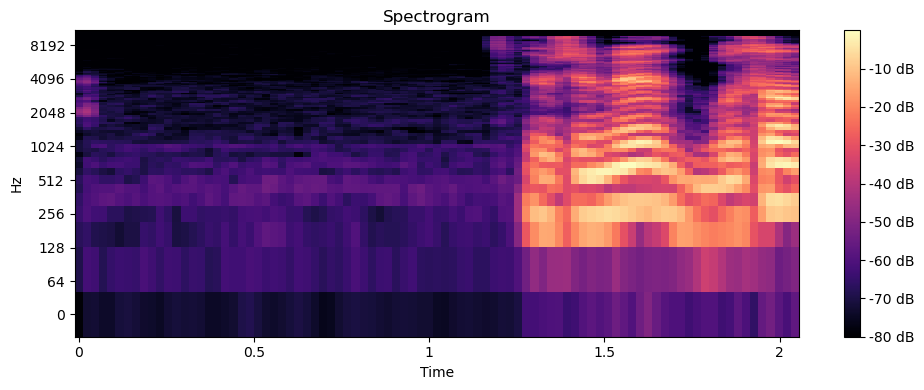

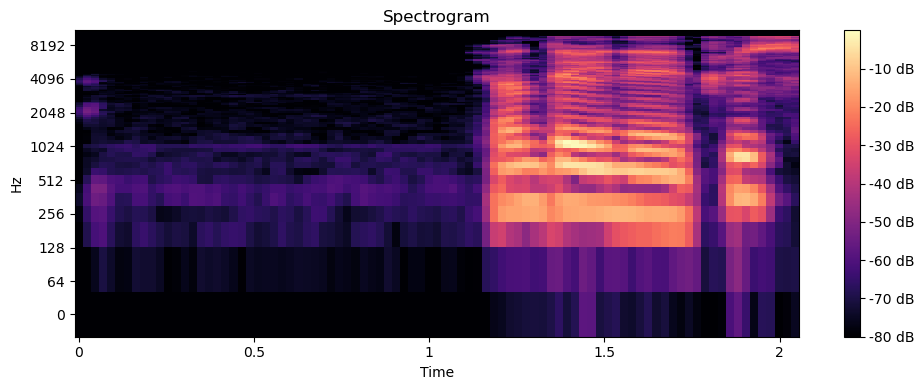

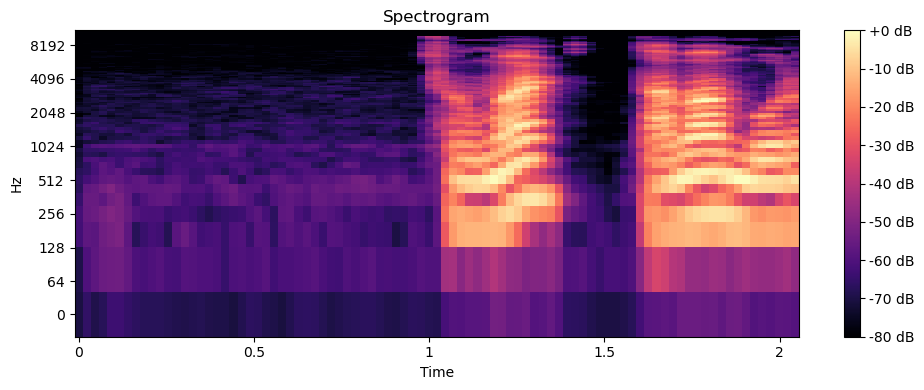

In [19]:
for i in range(3):
    plot_spectrogram(voice_spectogram.iloc[i,0])

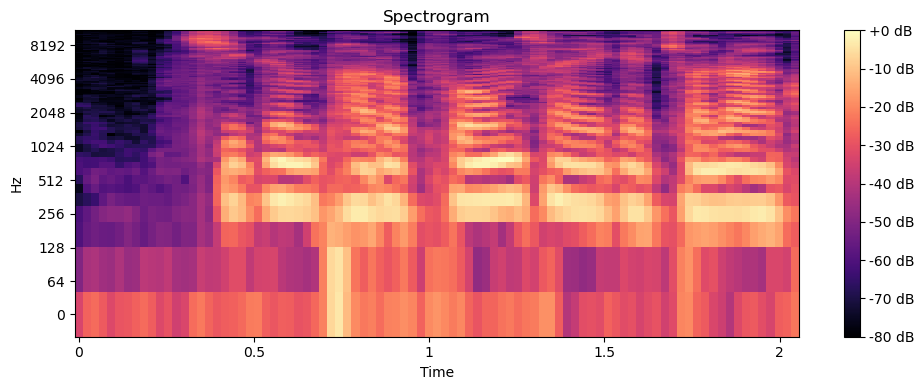

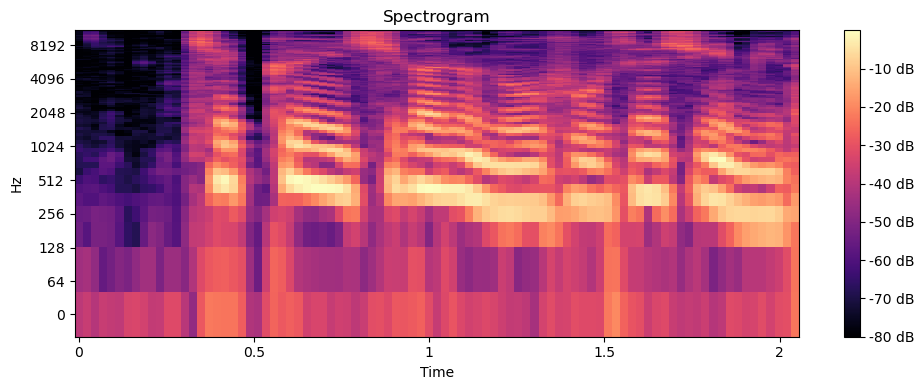

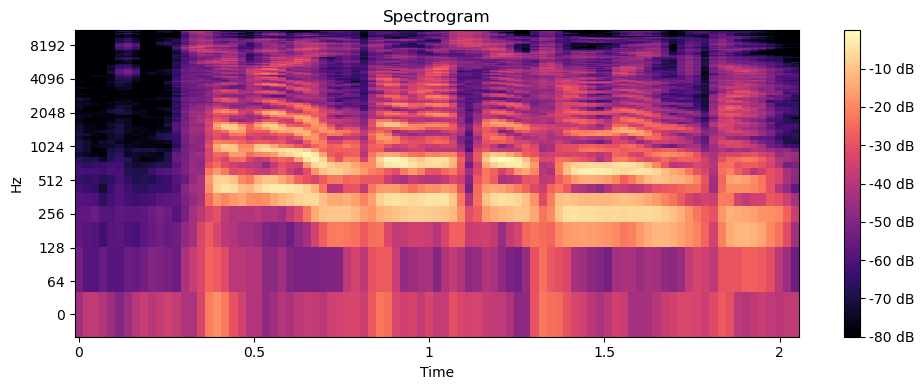

In [20]:
for i in range(3):
    plot_spectrogram(deepvoice_spectogram.iloc[i,0])

In [25]:
import os
X_mfcc=50
normal_save_dir='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/image/normal voice'
path1 = '/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/normal voice/row/일반 음성/'  


for file in voice_data_list:
    file_path = os.path.join(path1, file)
    if os.path.isfile(file_path):  # 파일인지 확인
        audio, sr = librosa.load(file_path, sr=None)  # 원본 샘플링 레이트를 사용
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmax=fmax)
        log_S = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(5, 4))
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(os.path.join(normal_save_dir, file[:-4] + '.png'))
        plt.close()



In [26]:
abnormal_save_dir='/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/image/deep voice'
path2 = '/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/deep voice/row/'  


for file in deepvoice_data_list:
    file_path = os.path.join(path2, file)
    if os.path.isfile(file_path):  
        audio, sr = librosa.load(file_path, sr=None)  
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmax=fmax)
        log_S = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(5, 4))
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(os.path.join(abnormal_save_dir, file[:-4] + '.png'))
        plt.close()
